### KNN - K Nearest Neighbour

Importing Libraries reading data and preprocessing the data similar to linear and logistic regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv(r'Iris.csv',index_col=0)

In [16]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


In [4]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.shape

(150, 5)

In [6]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data[['Species']]

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

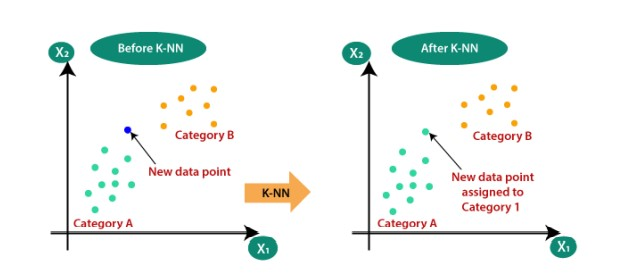

1. Euclidean distance


2. Manhattan distance


3. Minkowski distance > default


4. Hamming distance

Running KNN algorithmn

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [10]:
model_KNN.fit(x_train,y_train)

C:\Users\khatr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [11]:
Y_pred=model_KNN.predict(x_test)
print(list(zip(y_test,Y_pred)))

[('Species', 'versicolor')]


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.92      0.96        13
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy of the model:  0.9666666666666667


In [13]:
new_data = pd.DataFrame()
new_data = (x_test)

new_data['Actual_Species'] = y_test
new_data['Predicted_Species'] = Y_pred

In [14]:
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Actual_Species,Predicted_Species
Id,,,,,,
88,6.3,2.3,4.4,1.3,versicolor,versicolor
112,6.4,2.7,5.3,1.9,virginica,virginica
11,5.4,3.7,1.5,0.2,setosa,setosa
92,6.1,3.0,4.6,1.4,versicolor,versicolor
50,5.0,3.3,1.4,0.2,setosa,setosa
61,5.0,2.0,3.5,1.0,versicolor,versicolor
73,6.3,2.5,4.9,1.5,versicolor,virginica
68,5.8,2.7,4.1,1.0,versicolor,versicolor
40,5.1,3.4,1.5,0.2,setosa,setosa
